In [51]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder


**Data Loading and Preprocessing**

In [52]:
image_dir = '/kaggle/input/digits/digits_jpeg/digits_jpeg/'

X = []
y = []

for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            img = Image.open(image_path).convert('L').resize((8, 8))
            img_array = np.array(img).flatten() 
            X.append(img_array)
            y.append(label)

X = np.array(X)
y = np.array(y)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (10160, 64)
Shape of y: (10160,)


**Splitting the Dataset**

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


**Model Training with Grid Search**

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ['linear']},
             scoring='accuracy')

In [55]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

**Results**

In [56]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)
print("Test set accuracy: ", grid_search.score(X_test, y_test))

Best parameters found:  {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
Best cross-validation accuracy:  0.9715984039582783
Test set accuracy:  0.9812992125984252


**Model Evaluation**

In [57]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[302,   0,   1,   0,   0,   0,   2,   0,   0,   0],
       [  0, 299,   1,   0,   1,   0,   0,   2,   0,   0],
       [  0,   0, 318,   0,   1,   0,   0,   1,   0,   0],
       [  0,   1,   2, 290,   0,   2,   0,   0,   0,   0],
       [  1,   0,   0,   0, 307,   0,   1,   0,   0,   0],
       [  0,   1,   0,   7,   1, 287,   2,   0,   1,   1],
       [  2,   0,   0,   0,   1,   1, 287,   0,   0,   0],
       [  0,   2,   2,   1,   0,   0,   0, 319,   0,   0],
       [  1,   0,   0,   0,   1,   2,   1,   0, 294,   3],
       [  2,   0,   0,   3,   1,   0,   0,   2,   3, 288]])

**A heatmap to visualize the results**

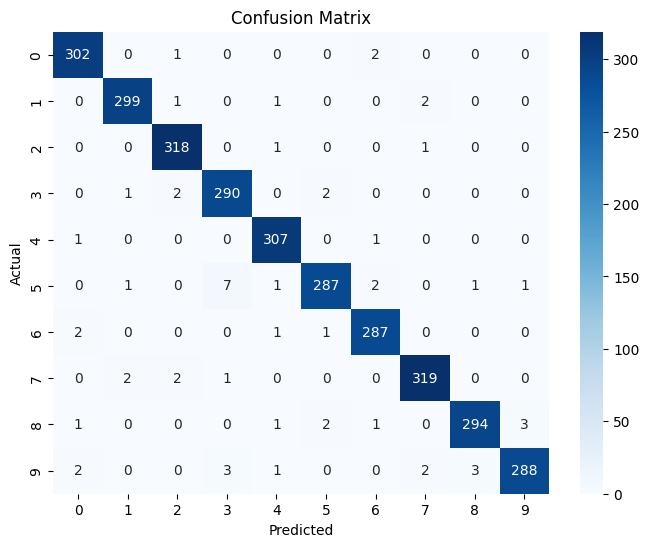

In [58]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
